# **DSCI 100 Project:** *Are the "Chronically Online" More Likely to Subscribe?*

## Introduction
#### Background
This project and many others from fellow DSCI 100 students will be used to aide a UBC computer science research group led by Frank Wood with the goal of determining how people play video games. The team has set up a MineCraft server in hopes of logging players' actions in the game.
#### Questions
*Broad Question:* What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

*Specific Question:* Are experience, number of sessions played, hours played, and age good predictors of subscription to a game-related newsletter? How do these variables differ between various player experience categories/types?
#### Data Description
This project will use two sets of data that contain player identification and traits and their logged sessions. 

The first file is named "players.csv":
* CSV file, delimited by ",'.
* 196 observations (players)
* 7 variables
* Experience, subscription status, hashed E-mail, name, and gender are categorical.
* Hours played and age are quantitative.
* Experience is split into beginner, amatuer, regular, veteran and pro, but it is hard to know how these rank comparatively. I have ordered them into what I think is appropriate in terms of least to most experience based on naming.

The second file is named "sessions.csv":
* CSV file, delimited by ",".
* 1535 observations (sessions)
* 5 variables
* Hashed E-mail is categorical.
* Start time, end time, original start time, and original end time are quantitative.
* The data is not tidy as the date of the start and end times are in the same cells as the hours for those variables.
* The original start and original end times are in some unknown unit with a magnitude of E+12. It is harder to interpret, but may be easier to use in terms of analysis than the start and end times because it is a single number in each cell.

## Methods & Results
To begin the data analysis, we must first load the relevant packages and datasets. I will use clean_names() from the janitor package to replace spaces and/or add underscores and remove capital letters. The code should run fine without this step as I have checked the column names beforehand, but this step makes everything tidier and more cohesive.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
library(RColorBrewer)

players <- read_csv("data/players.csv") |>
    clean_names()
sessions <- read_csv("data/sessions.csv")|>
    clean_names()

head(players)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


For this project, I will not be working with the start and end times of each session and instead the number of sessions for each player. To get the number of sessions played, I will use n() to count the number of times each hashed_email (player identification) appears and summarise it into a tibble.

In [2]:
n_sessions <- sessions |>
    group_by(hashed_email) |>
    summarise(number_of_sessions = n())

I will then join this to the number of sessions per player with their other data from "players" to create one main dataset to work off of. I am using full_join() to do this and I will be joining by "hashed_email".

In [3]:
combined_data <- full_join(players, n_sessions, by = "hashed_email")
head(combined_data)
tail(combined_data)

experience,subscribe,hashed_email,played_hours,name,gender,age,number_of_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


experience,subscribe,hashed_email,played_hours,name,gender,age,number_of_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20,NA
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,1
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,1


Because of the full join, there are some NA's in the rightmost "number_of_sessions" column. This result is because some of the hashed emails appeared 0 times ie. the individual had 0 sessions. We will need to change the NA's to 0. We will also want to change "subscribe" from logical data to a factor because we will use it as the outcome for our model later on.

In [4]:
combined_data <- combined_data |>
            mutate(number_of_sessions = coalesce(number_of_sessions, 0), subscribe = as_factor(subscribe))

#### Data Visualisation
We want to predict subscription to a game_related newsletter based on a few variables. Becuase subscription status "subscribe" is a binary true or false, we are dealing with a classification problem. We should first visualise the variables we want to work with. We can also use the package RColorBrewer to pick a colourblind friendly pallette.

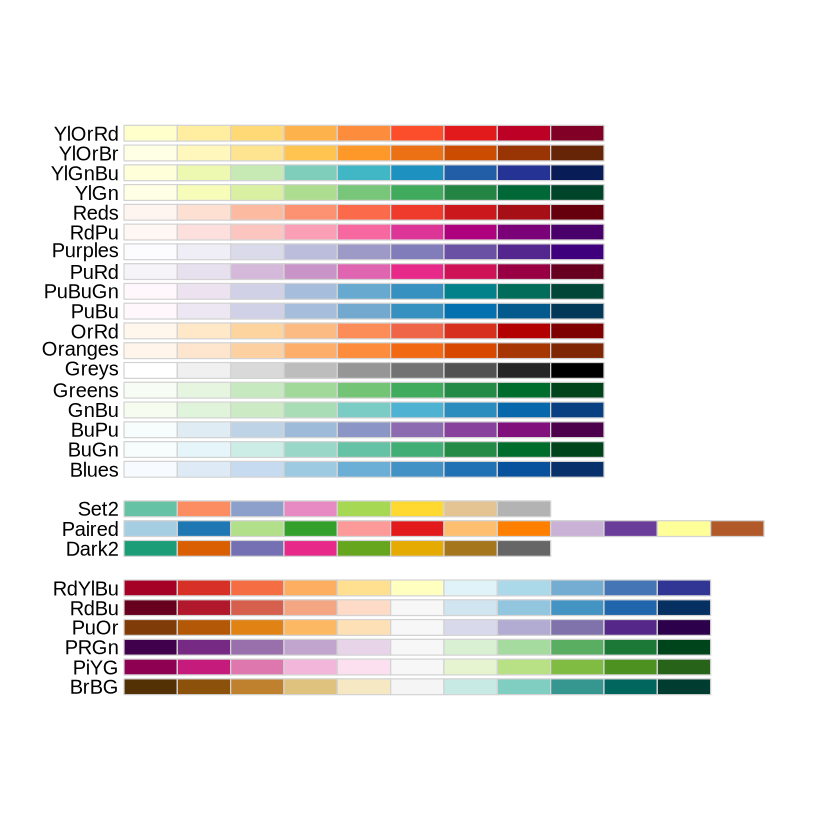

In [5]:
display.brewer.all(colorblindFriendly = TRUE)

I will be using the "Dark2" pallette above for any plots that have the option to add colour. 

A bar graph will be used to compare the subscription status propotions for different experience levels because both are categorical variables.

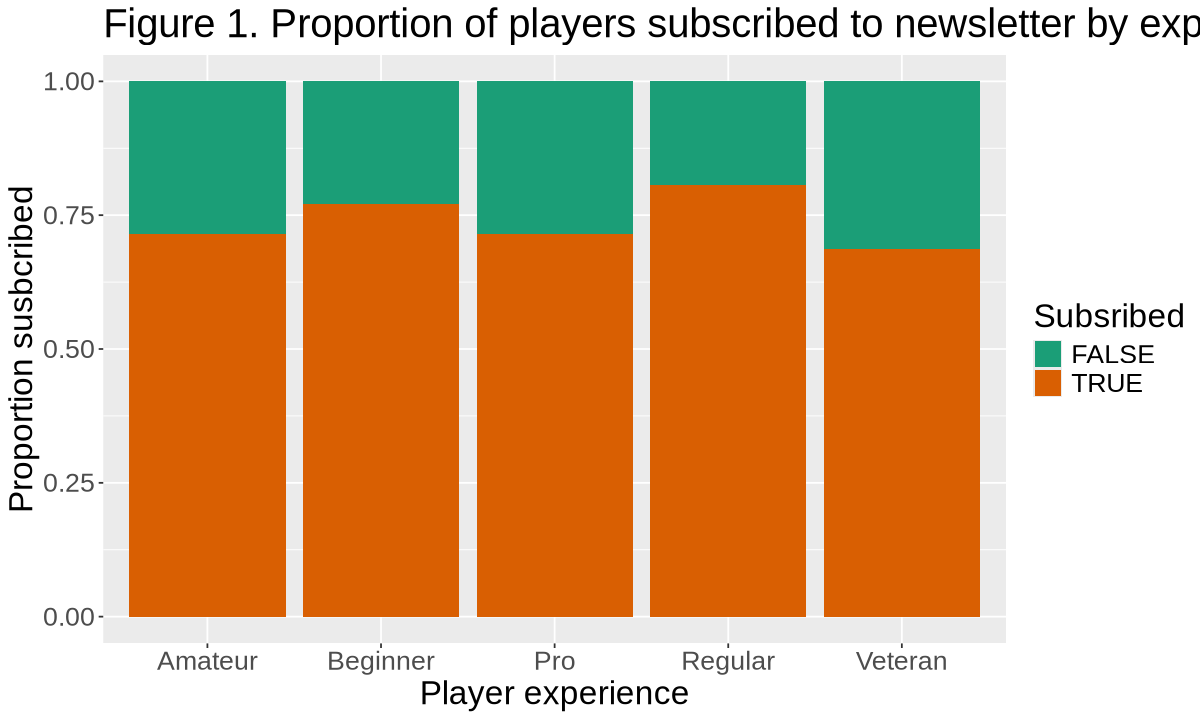

In [6]:
options(repr.plot.width = 10, repr.plot.height = 6)
exp_n_sub_plot <- combined_data |>
    ggplot(aes(x = experience, fill = subscribe)) + 
    geom_bar(position = 'fill') + 
    xlab("Player experience") +
    ylab("Proportion susbcribed") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 1. Proportion of players subscribed to newsletter by experience") +
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
exp_n_sub_plot

For comparing the number of sessions played for subscribers and nonsubscribers, we can use a boxplot to see if there appears to be any difference in mean since we are plotting a categorical varible with a numeric variable.

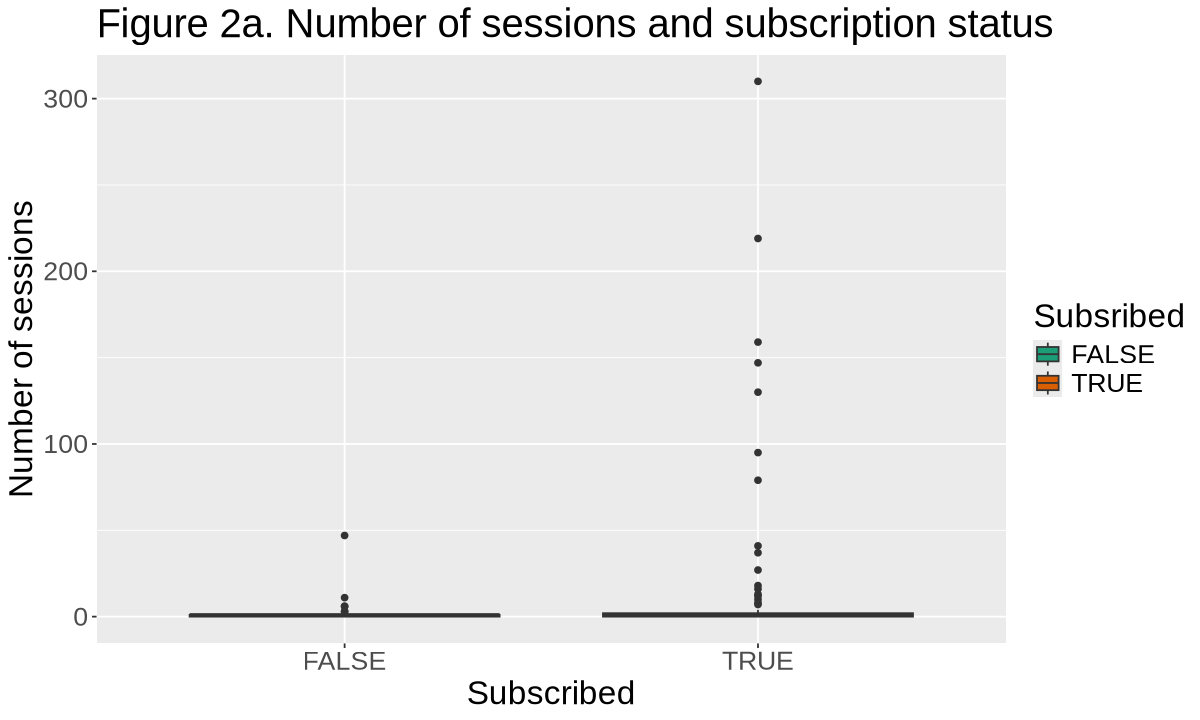

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)
sessions_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = number_of_sessions, fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Number of sessions") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 2a. Number of sessions and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
sessions_n_sub_plot

The above boxplot is hard to read because there are many outliers and the vast majority of players only played for 1 session as can be seen below with the median. We should scale the number of sessions by taking the log and also limit the y-axis to see the differences better.

Warning message:
“Removed 89 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


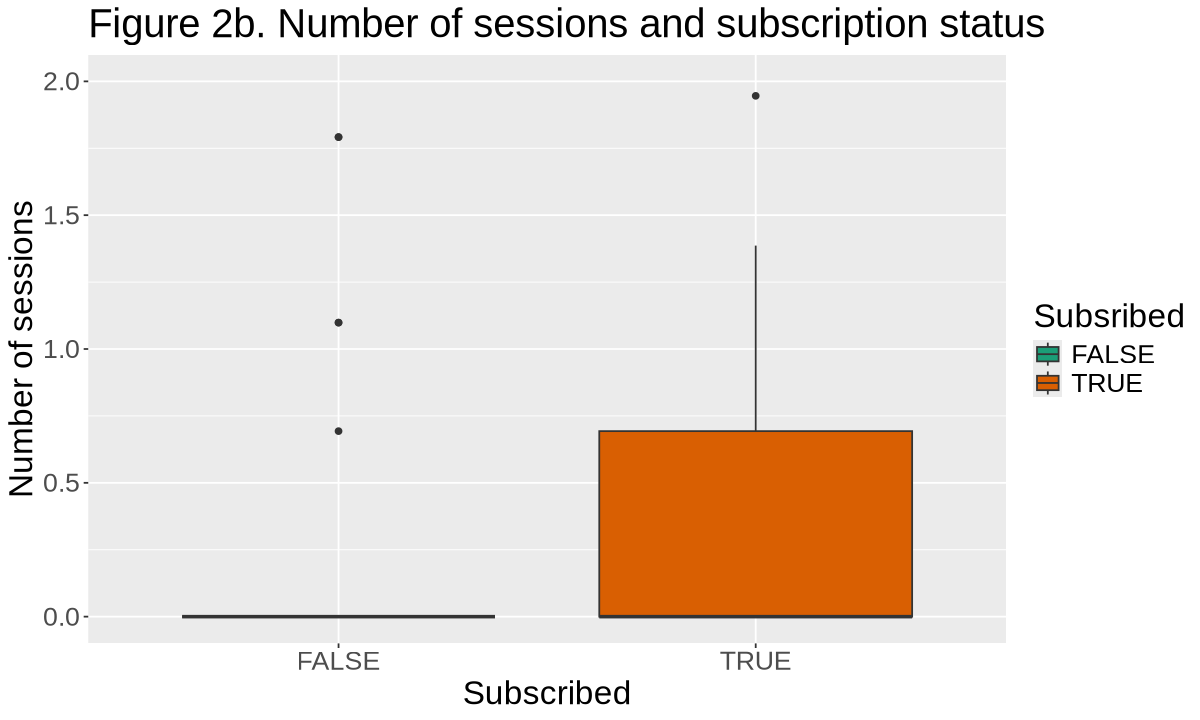

In [8]:
options(repr.plot.width = 10, repr.plot.height = 6)
log_sessions_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = log(number_of_sessions), fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Number of sessions") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 2b. Number of sessions and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2') +
    ylim(c(0,2))
log_sessions_n_sub_plot

We can do the same type of visualisation for hours played as we are dealing with the same type of variables again.

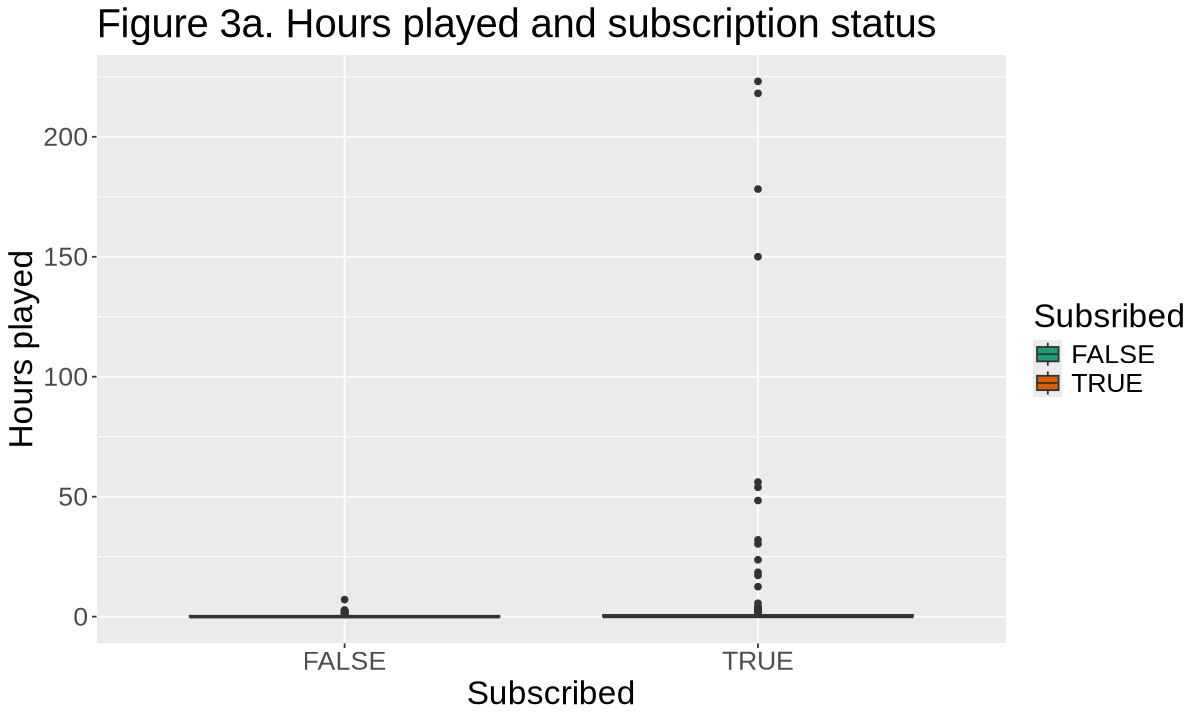

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6)
hours_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Hours played") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 3a. Hours played and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
hours_n_sub_plot

We are encountering the same problem as we did with the number of sessions played and can solve it the same way as before.

Warning message:
“Removed 154 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


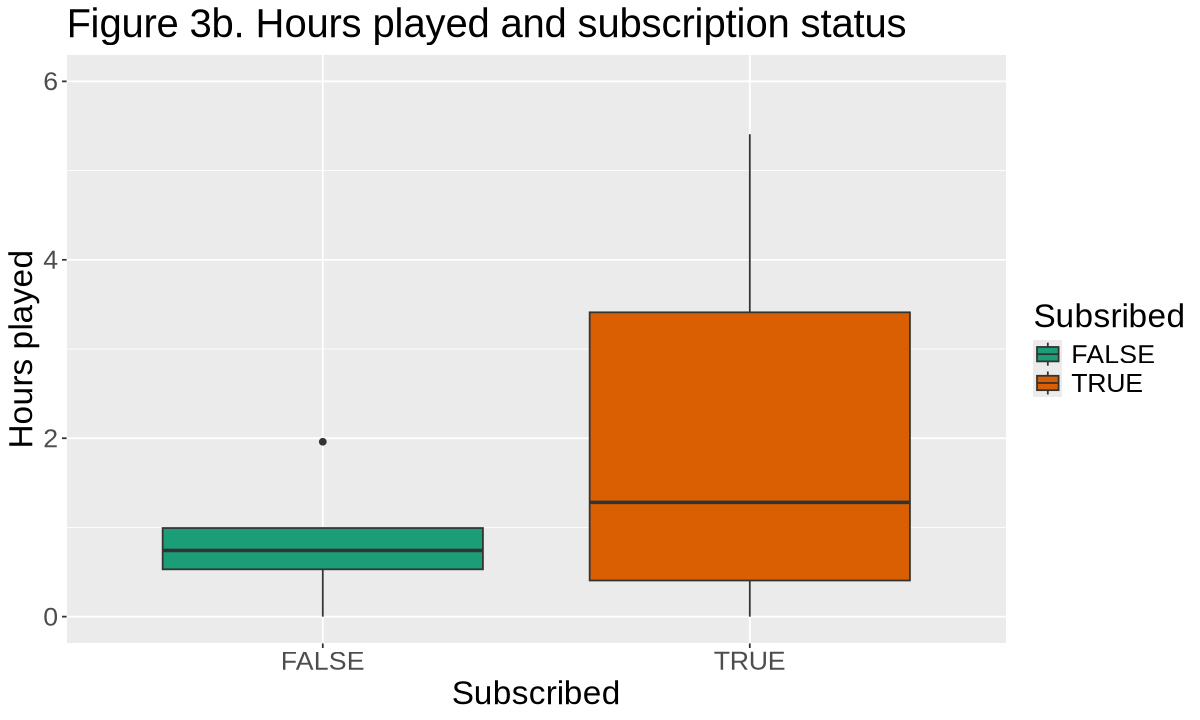

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
log_hours_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = log(played_hours), fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Hours played") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 3b. Hours played and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2') +
    ylim(c(0, 6))
log_hours_n_sub_plot

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


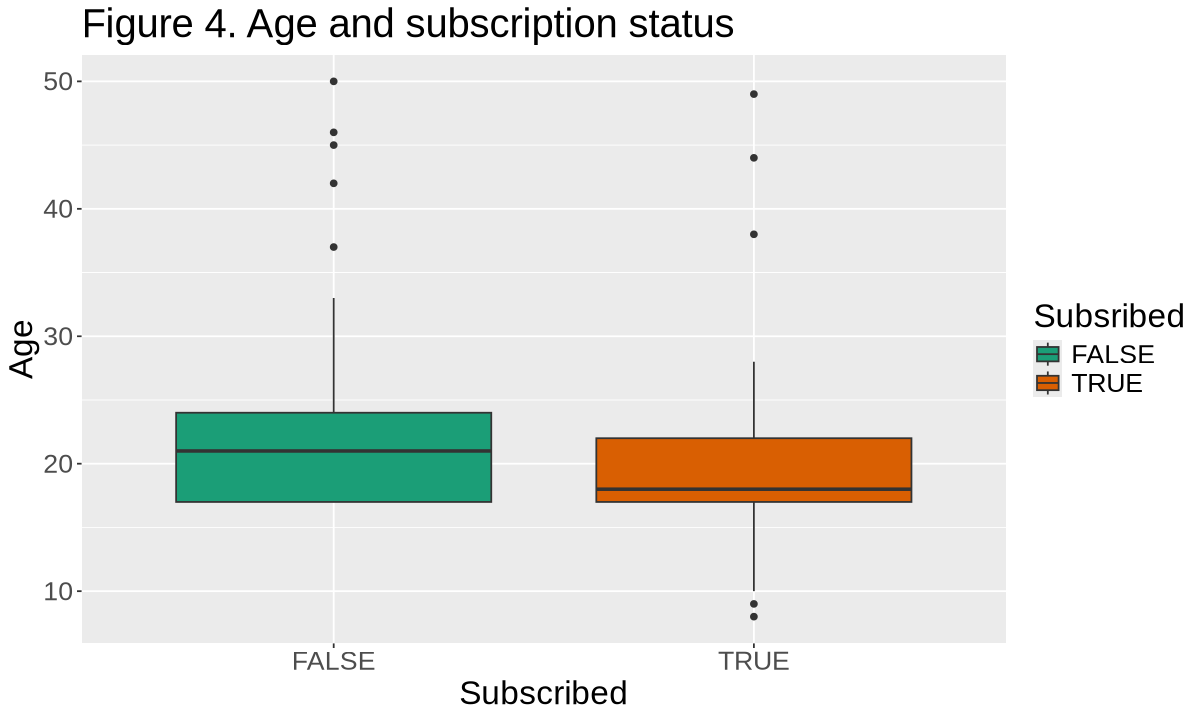

In [11]:
options(repr.plot.width = 10, repr.plot.height = 6)
age_n_sub_plot <- combined_data |>
    ggplot(aes(x = subscribe, y = age, fill = subscribe)) + 
    geom_boxplot() + 
    xlab("Subscribed") +
    ylab("Age") +
    labs(fill = "Subsribed") +
    ggtitle("Figure 4. Age and subscription status") + 
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Dark2')
age_n_sub_plot

<code style="background:yellow;color:black">Based on the bar plot and box plots above, we can assume that player experience is not a good predictor of subscription and that the other variables will need to be scaled (and centered).</code>

#### Data Analysis
Now that we have a some understanding of how each variable we chose relates to whether or not a player is subscribed to the newsletter, we can move on to analysing the data. 

We will be creating a K-nearest neighbours model with our selected predictors because we are dealing with a classification problem. *Experience will be excluded from the model because it is a poor predictor and not numeric.* There are ways to incorporate it, but it is beyond the scope of what is taught in this course. The first step is to split our data into a training and testing set. We must also remember to set a seed so that the random number generator starts at the same point throughout so our result does not change.

In [12]:
set.seed(888)
mc <- combined_data |>
    select(subscribe, played_hours, age, number_of_sessions)
mc_split <- initial_split(mc, prop = 0.75, strata = subscribe)  
mc_train <- training(mc_split)   
mc_test <- testing(mc_split)

The next step will be to create a recipe (remembering to scale and center) and a model to find the most appropriate value of k, or in other words, tuning.

In [13]:
set.seed(888)
mc_recipe <- recipe(subscribe ~ number_of_sessions + played_hours + age, data = mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
mc_tune_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

Now we also want to make several folds for cross-validation to help estimate the accuracy of our model. We also want to make a grid of possible k-values for our model.

In [14]:
set.seed(888)
mc_vfold <- vfold_cv(mc_train, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

The next step is to put everything into a workflow and collect the metrics for cross validation.

In [15]:
set.seed(888)
knn_results <- workflow() |>
       add_recipe(mc_recipe) |>
       add_model(mc_tune_model) |>
       tune_grid(resamples = mc_vfold, grid = k_vals) |>
       collect_metrics()

To decide which value of k we want to use in our model, we need to visualise the results by plotting accuracy against k (number of neighbours). It is also possible to find the best k without visualising (also included below).

[1] 13

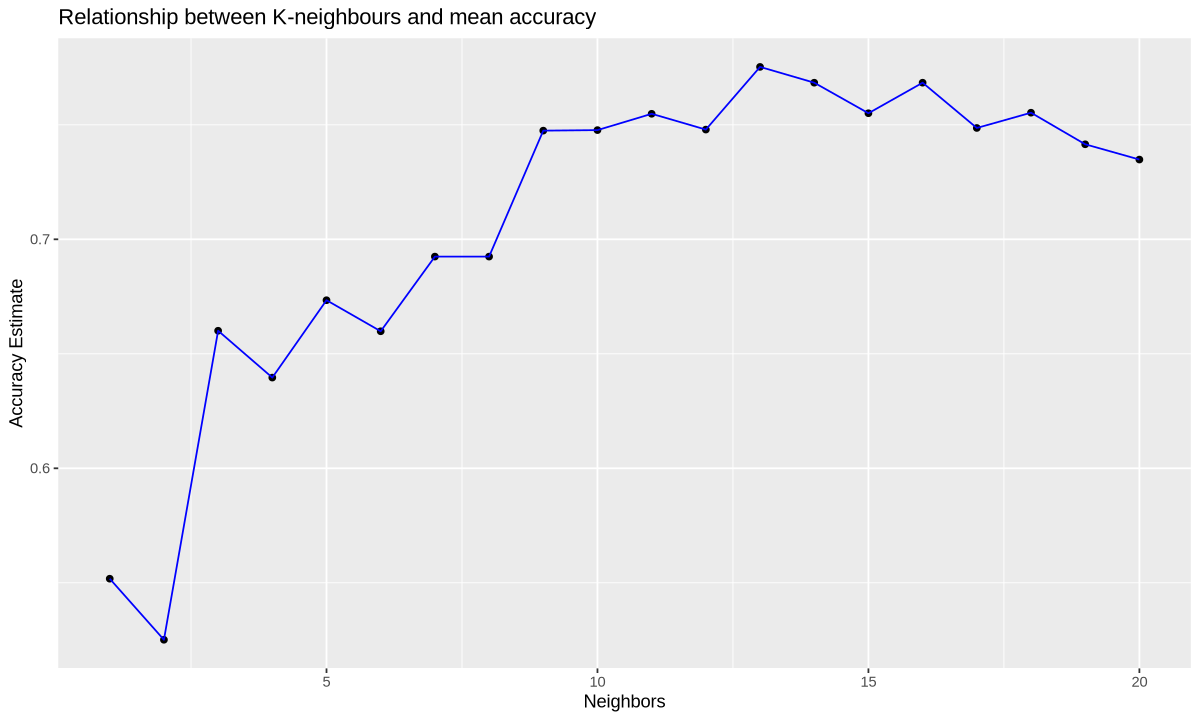

In [16]:
cross_val <- knn_results |>
    filter(.metric == "accuracy")
cross_val_plot <- cross_val |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line(colour = "blue") +
    labs(title = "Relationship between K-neighbours and mean accuracy", x = "Neighbors", y = "Accuracy Estimate")
cross_val_plot

best_k <- cross_val |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

I will be choosing to use k = 13 for our model because that is where the peak in accuracy is. Any further increase begins to decrease slightly and plateau.

In [17]:
set.seed(888) 
mc_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
       set_engine("kknn") |>
       set_mode("classification")
mc_fit <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(mc_model) |>
  fit(data = mc)

With the model created, we can test it using the testing set we made earlier.

In [18]:
set.seed(888)
mc_test_predictions <- predict(mc_fit, mc_test) |>
  bind_cols(mc_test)

cancer_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

ERROR: [1m[33mError[39m in `bind_cols()`:[22m
[33m![39m Can't recycle `..1` (size 47) to match `..2` (size 49).


## Discussion

## References